### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style='darkgrid',font_scale=1.25)

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

import scipy.cluster.hierarchy as sch

from mpl_toolkits.mplot3d import Axes3D

pd.set_option('display.max_columns', None) 

In [2]:
df = pd.read_csv("loyaltydata.csv")

In [3]:
df

,id,loyalty1,loyalty2,loyalty3
0,1,9,10,4
1,2,10,11,5
2,3,10,10,5
3,4,9,10,5
4,5,8,11,4
...,...,...,...,...
995,996,9,12,5
996,997,11,12,5
997,998,10,13,5
998,999,9,11,5


In [4]:
X = df.iloc[:,1:]

In [5]:
X.values

array([[ 9, 10,  4],
       [10, 11,  5],
       [10, 10,  5],
       ...,
       [10, 13,  5],
       [ 9, 11,  5],
       [ 9, 13,  5]], dtype=int64)

### Use Dendogram

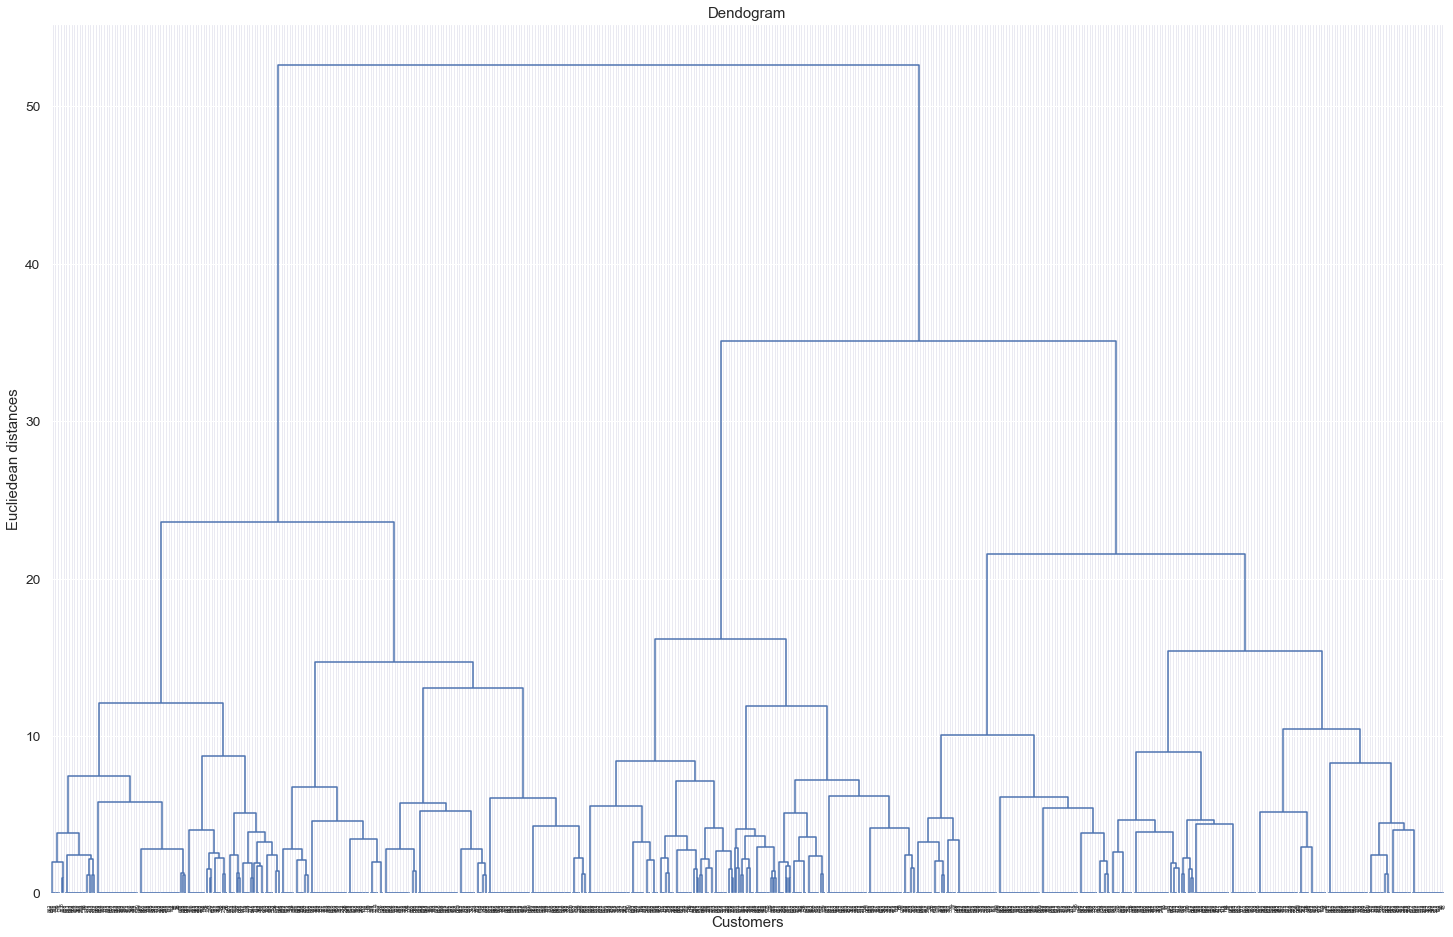

In [6]:
plt.figure(figsize=(25,16))
dendogram = sch.dendrogram(sch.linkage(X,method='ward'),truncate_mode='level',color_threshold=0)
plt.title("Dendogram")
plt.xlabel("Customers")
plt.ylabel("Eucliedean distances")
plt.show()

### Fitting hierachical cluster

In [7]:
hc = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')

In [8]:
y_hc = hc.fit_predict(X)

In [9]:
y_hc

array([0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 2, 1, 0, 1, 1, 1, 1, 2, 0, 1, 1,
       0, 0, 1, 0, 2, 1, 0, 2, 1, 0, 1, 0, 1, 2, 0, 1, 1, 2, 1, 0, 1, 1,
       0, 1, 1, 2, 1, 2, 2, 0, 0, 0, 0, 1, 1, 1, 1, 2, 1, 0, 0, 0, 1, 2,
       0, 0, 0, 2, 1, 1, 0, 1, 0, 2, 0, 2, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 2, 0, 1, 1, 2, 0, 0, 1, 1, 0, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 0, 0, 1, 1, 2, 2, 1, 1,
       1, 2, 1, 2, 0, 0, 0, 1, 2, 1, 1, 1, 1, 1, 1, 0, 2, 2, 2, 2, 0, 2,
       2, 1, 2, 0, 0, 1, 2, 1, 0, 0, 2, 1, 1, 2, 0, 0, 2, 2, 1, 1, 0, 1,
       0, 2, 1, 0, 0, 0, 0, 1, 0, 1, 2, 1, 1, 2, 0, 2, 1, 0, 0, 0, 0, 1,
       2, 2, 0, 1, 0, 0, 0, 1, 1, 2, 0, 1, 1, 0, 2, 0, 1, 2, 2, 1, 1, 2,
       0, 0, 1, 1, 0, 1, 0, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 1, 1, 0, 0, 1,
       1, 2, 1, 0, 1, 0, 0, 2, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 2, 0, 0, 0,
       0, 2, 0, 2, 1, 0, 0, 0, 1, 0, 2, 2, 0, 0, 0, 1, 0, 2, 1, 1, 1, 2,
       2, 2, 0, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 0, 1,

In [10]:
y = pd.DataFrame(y_hc,columns=['Cluster'])

In [11]:
y

,Cluster
0,0
1,1
2,1
3,0
4,0
...,...
995,0
996,1
997,2
998,0


In [12]:
y['Cluster'].unique()

array([0, 1, 2], dtype=int64)

In [13]:
y['Cluster'].value_counts()

1    410
0    374
2    216
Name: Cluster, dtype: int64

In [14]:
newdf = pd.concat([df,y],axis=1)

In [15]:
newdf

,id,loyalty1,loyalty2,loyalty3,Cluster
0,1,9,10,4,0
1,2,10,11,5,1
2,3,10,10,5,1
3,4,9,10,5,0
4,5,8,11,4,0
...,...,...,...,...,...
995,996,9,12,5,0
996,997,11,12,5,1
997,998,10,13,5,2
998,999,9,11,5,0


In [16]:
meandf = newdf.groupby(by='Cluster').mean()

In [17]:
meandf

,id,loyalty1,loyalty2,loyalty3
Cluster,,,,
0,515.582888,9.000000,9.622995,4.227273
1,486.726829,10.324390,10.407317,5.143902
2,500.527778,10.930556,11.958333,6.398148


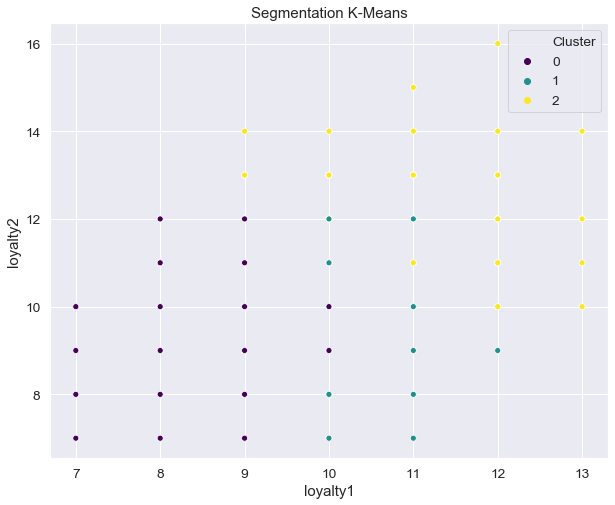

In [18]:
x_axis = newdf['loyalty1']
y_axis = newdf['loyalty2']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis,y_axis,hue=newdf['Cluster'],palette='viridis')
plt.title('Segmentation K-Means')
plt.show()

### K-Means Clustering

In [19]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

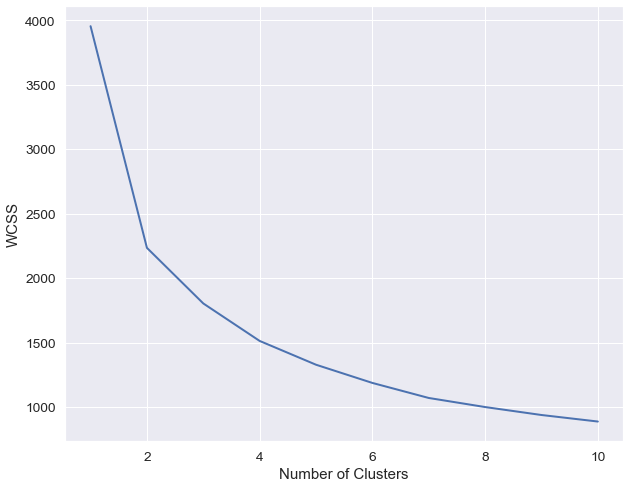

In [20]:
plt.figure(figsize=(10,8))
plt.plot(range(1,11),wcss,linewidth=2)
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

### Execute K-Means after determining the suitable cluster

In [21]:
kmeans = KMeans(n_clusters=2,init='k-means++',random_state=0)

In [22]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

### Results

In [23]:
df_segm_kmeans = df.copy()

In [24]:
df_segm_kmeans

,id,loyalty1,loyalty2,loyalty3
0,1,9,10,4
1,2,10,11,5
2,3,10,10,5
3,4,9,10,5
4,5,8,11,4
...,...,...,...,...
995,996,9,12,5
996,997,11,12,5
997,998,10,13,5
998,999,9,11,5


In [25]:
df_segm_kmeans['Segment K-Means'] = kmeans.labels_

In [26]:
df_segm_kmeans

,id,loyalty1,loyalty2,loyalty3,Segment K-Means
0,1,9,10,4,0
1,2,10,11,5,1
2,3,10,10,5,0
3,4,9,10,5,0
4,5,8,11,4,0
...,...,...,...,...,...
995,996,9,12,5,1
996,997,11,12,5,1
997,998,10,13,5,1
998,999,9,11,5,0


In [27]:
df_segm_analysis = df_segm_kmeans.groupby(['Segment K-Means']).mean()

In [28]:
df_segm_analysis

,id,loyalty1,loyalty2,loyalty3
Segment K-Means,,,,
0,518.541586,9.384913,9.528046,4.417795
1,481.188406,10.575569,11.434783,5.772257


In [29]:
df_segm_analysis['NoofObservations'] = df_segm_kmeans[['Segment K-Means','loyalty1']].groupby(['Segment K-Means']).count()

In [30]:
df_segm_analysis['ProportionofObservations'] = df_segm_analysis['NoofObservations']/ df_segm_analysis['NoofObservations'].sum()

In [31]:
df_segm_analysis

,id,loyalty1,loyalty2,loyalty3,NoofObservations,ProportionofObservations
Segment K-Means,,,,,,
0,518.541586,9.384913,9.528046,4.417795,517,0.517
1,481.188406,10.575569,11.434783,5.772257,483,0.483


### Plot the clusters

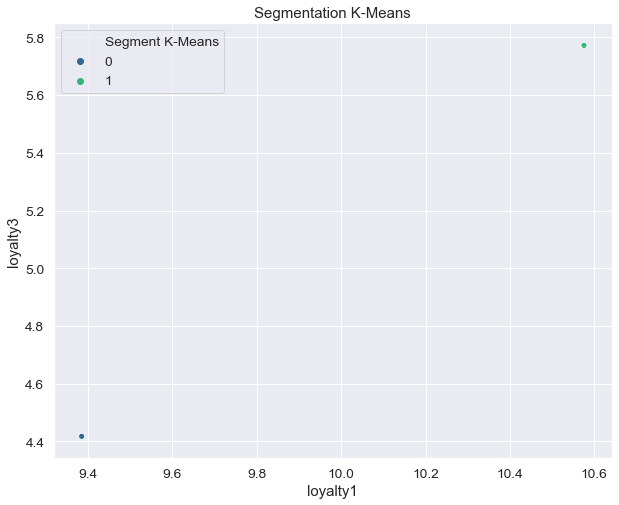

In [32]:
x_axis = df_segm_analysis['loyalty1']
y_axis = df_segm_analysis['loyalty3']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis,y_axis,hue=df_segm_analysis.index,palette='viridis')
plt.title('Segmentation K-Means')
plt.show()